# Entregable 1 (RNN)
Por Carlos Sánchez Polo
Asignatura Deep Learning

## Enunciado:

Aplicación de SimpleRNN a:
1. Dataset IMDB de Keras (https://keras.io/api/datasets/imdb/),
2. Otro Dataset de Keras o TensorFlow (https://keras.io/api/datasets/, https://www.tensorflow.org/datasets/catalog/overviewhl=%20es#all_datasets)

In [ ]:
#!pip install tensorflow

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

from keras import models
from keras import layers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
maxlen = 1000
x_train = sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = sequence.pad_sequences(test_data, maxlen=maxlen)

In [4]:
from keras import regularizers

max_words = 10000
embedding_dim = 32

# Definir el modelo
model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [5]:
history = model.fit(x_train, 
                    train_labels, 
                    epochs=15,
                    batch_size=512, 
                    validation_split=0.2)
                    



Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.5028 - loss: 0.9377 - val_accuracy: 0.4936 - val_loss: 0.7904
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.5518 - loss: 0.7188 - val_accuracy: 0.7906 - val_loss: 0.5374
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.8326 - loss: 0.4846 - val_accuracy: 0.8372 - val_loss: 0.4380
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8849 - loss: 0.3740 - val_accuracy: 0.8720 - val_loss: 0.3808
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9130 - loss: 0.3174 - val_accuracy: 0.8742 - val_loss: 0.3640
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9232 - loss: 0.2973 - val_accuracy: 0.8824 - val_loss: 0.3509
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9361 - loss: 0.2707 - val_accuracy: 0.8754 - val_loss: 0.3557
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9381 - loss: 0.2564 - val_accuracy: 0.

In [8]:
val_acc_train = history.history['accuracy']
val_acc_test = history.history['val_accuracy']

results = model.evaluate(x_test, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8762 - loss: 0.3579


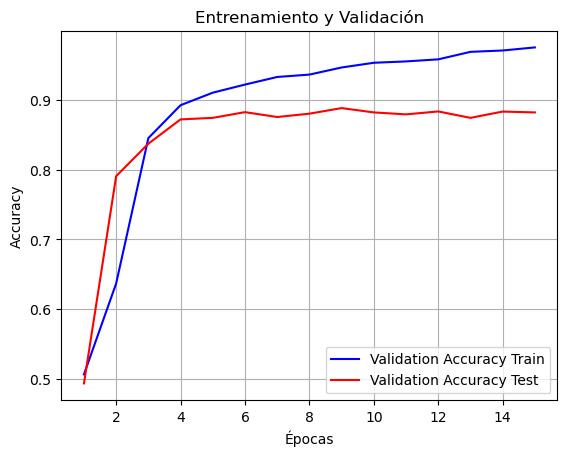

In [10]:
import matplotlib.pyplot as plt

# Crear el gráfico
epochs = range(1, len(val_acc_train) + 1)
plt.plot(epochs, val_acc_train, 'b', label='Validation Accuracy Train')
plt.plot(epochs, val_acc_test, 'r', label='Validation Accuracy Test')
plt.title('Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()
